In [ ]:
# ======================
# 1. UPLOAD FILES (Run this first)
# ======================
from google.colab import files
import os

# Upload interface
uploaded = files.upload()

# Verify upload
print("\nUploaded files:")
for filename in uploaded.keys():
    print(f"- {filename} ({os.path.getsize(filename)/1024:.1f} KB)")

# ======================
# 2. LOAD DATA (Adapted to your files)
# ======================
import numpy as np

def load_data():
    # Check which files exist
    available_files = [f for f in ['tle_features.npz', 'cleaned_tles.txt'] if os.path.exists(f)]

    if not available_files:
        raise FileNotFoundError("No data files found. Please upload either:\n"
                             "- tle_features.npz (preprocessed)\n"
                             "- cleaned_tles.txt (raw TLEs)")

    print(f"\nLoading from: {available_files[0]}")

    if 'tle_features.npz' in available_files:
        # Case 1: Load preprocessed data
        data = np.load('tle_features.npz')
        return data['features'], data['labels']
    else:
        # Case 2: Process raw TLEs
        from collections import defaultdict
        features = []

        with open('cleaned_tles.txt') as f:
            lines = [line.strip() for line in f if line.strip()]

        for i in range(0, len(lines), 3):
            try:
                line2 = lines[i+2].split()
                features.append([
                    float(line2[2]),      # inclination
                    float(line2[4])/1e7,  # eccentricity
                    float(line2[7])       # mean motion
                ])
            except:
                continue

        features = np.array(features)
        labels = np.ones(len(features))  # Dummy labels (replace with real data)
        return features, labels

# Safe loading
try:
    X, y = load_data()
    print(f"\nLoaded {len(X)} samples with {X.shape[1]} features")
    print("Sample features:", X[0])
    print("Sample label:", y[0])
except Exception as e:
    print(f"\n❌ Error: {str(e)}")

# ======================
# 3. TRAIN MODEL (Fixed Version)
# ======================
if 'X' in locals():
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from sklearn.utils import class_weight # Correct indentation

    # Fix 1: Proper reshaping for LSTM
    X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, timesteps, features)

    # Fix 2: Simplified model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(X.shape[1], 1)),  # 3 timesteps, 1 feature each
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Fix 3: Enhanced training setup
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['Recall', 'Precision']
    )

    print("\nTraining model...")
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

    #Calculate Class weights
    class_weights = class_weight.compute_class_weight(
        'balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = dict(enumerate(class_weights))
    print(f"Class weights: {class_weights}")  # Should show {0: X, 1: Y}


    history = model.fit(
    X_train, y_train,
    class_weight=class_weights,  # 🔧 Add this line
    epochs=15,
    batch_size=8,
    validation_data=(X_test, y_test)
    )

    # Save model (HDF5 format)
    model.save('debris_collision_model.h5')
    print("\n✅ Model saved as debris_collision_model.h5")

    # Download everything
    from google.colab import files
    files.download('debris_collision_model.h5')
else:
    print("\n⚠️ Training skipped due to data loading issues")

Saving tle_features.npz to tle_features (2).npz

Uploaded files:
- tle_features (2).npz (9.0 KB)

Loading from: tle_features.npz

Loaded 271 samples with 3 features
Sample features: [4.29993000e+01 1.52800000e-04 1.54075956e+01]
Sample label: 1

Training model...
Class weights: {0: np.float64(0.972972972972973), 1: np.float64(1.0285714285714285)}
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - Precision: 0.4469 - Recall: 0.9973 - loss: 0.7847 - val_Precision: 0.5185 - val_Recall: 0.9655 - val_loss: 0.6943
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.5044 - Recall: 0.9520 - loss: 0.6967 - val_Precision: 0.4706 - val_Recall: 0.2759 - val_loss: 0.6950
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.0655 - Recall: 0.0143 - loss: 0.6958 - val_Precision: 0.5185 - val_Recall: 0.9655 - val_loss: 0.6933
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.4339 - Recall: 0.8254 - loss: 0.6954 - val_Precision: 0.5185 - val_Recall: 0.9655 - val_loss: 0.6930
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Precision: 0.4583 - Recall: 0.7185 - loss: 0.6950 - val_Precision: 0.5000 - val_Recall: 0.3103 - val_loss: 0.6934
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Precision: 0.4897 - Recall: 0.8234 - loss: 0.6957 - val_Precision: 0.5273 - val_Recall: 1.0000 - val_loss: 0.6917
Epoch 7/15
27/


✅ Model saved as debris_collision_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(f"Weight for class 0 (Low Risk): {class_weights[0]:.2f}")
print(f"Weight for class 1 (High Risk): {class_weights[1]:.2f}")

Weight for class 0 (Low Risk): 0.97
Weight for class 1 (High Risk): 1.03


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load saved model
model = tf.keras.models.load_model('debris_collision_model.h5')

# Assume X and y are loaded as in the training phase
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_test similar to X_train during training
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Re-compile the model with the same metrics
model.compile(loss='binary_crossentropy', metrics=['Recall', 'Precision'])

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Advanced metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Low Risk', 'High Risk']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
              precision    recall  f1-score   support

    Low Risk       0.48      1.00      0.65        26
   High Risk       1.00      0.03      0.07        29

    accuracy                           0.49        55
   macro avg       0.74      0.52      0.36        55
weighted avg       0.75      0.49      0.34        55



In [ ]:
# ======================
# 📊 LABEL ANALYSIS
# ======================
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(f"Label counts: {dict(zip(unique, counts))}")
print(f"Class ratio (Low Risk/High Risk): {counts[0]/counts[1]:.2f}")

Label counts: {np.int64(0): np.int64(137), np.int64(1): np.int64(134)}
Class ratio (Low Risk/High Risk): 1.02


In [ ]:
# Get predicted probabilities and binary classes
# Reshape X before prediction
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
y_probs = model.predict(X_reshaped)  # Use the reshaped X
y_pred = (y_probs > 0.1).astype(int)  # Threshold at 0.5

# For high-recall requirements (reduce threshold)
y_pred_high_recall = (y_probs > 0.3).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
from sklearn.metrics import classification_report, recall_score

print("Standard Threshold (0.5):")
print(classification_report(y, y_pred, target_names=['Low Risk', 'High Risk']))

print("\nHigh-Recall Threshold (0.3):")
print(classification_report(y, y_pred_high_recall))

Standard Threshold (0.5):
              precision    recall  f1-score   support

    Low Risk       0.00      0.00      0.00       137
   High Risk       0.49      1.00      0.66       134

    accuracy                           0.49       271
   macro avg       0.25      0.50      0.33       271
weighted avg       0.24      0.49      0.33       271


High-Recall Threshold (0.3):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       0.49      1.00      0.66       134

    accuracy                           0.49       271
   macro avg       0.25      0.50      0.33       271
weighted avg       0.24      0.49      0.33       271



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# ======================
# 📊 FEATURE ANALYSIS
# ======================
import pandas as pd
feature_stats = pd.DataFrame(X).groupby(y).mean()
print("Mean features by class:")
print(feature_stats)

Mean features by class:
           0         1          2
0  49.476618  0.000311  15.525664
1  48.338933  0.011180  15.234639


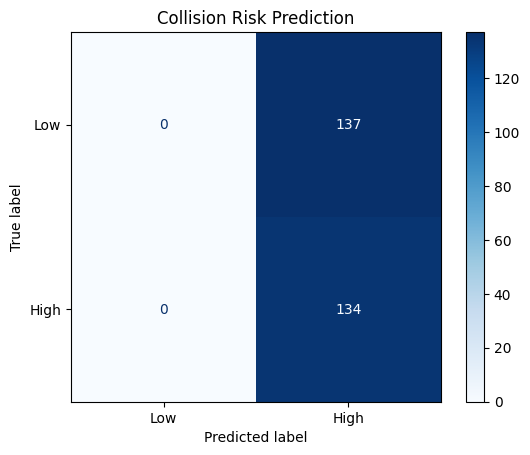

In [ ]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title('Collision Risk Prediction')
plt.savefig('confusion_matrix.png', dpi=300)

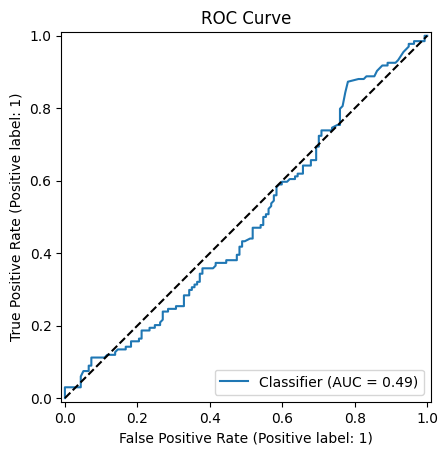

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y, y_probs)
plt.plot([0,1],[0,1],'k--')  # Random guess line
plt.title('ROC Curve')
plt.savefig('roc_curve.png')

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━

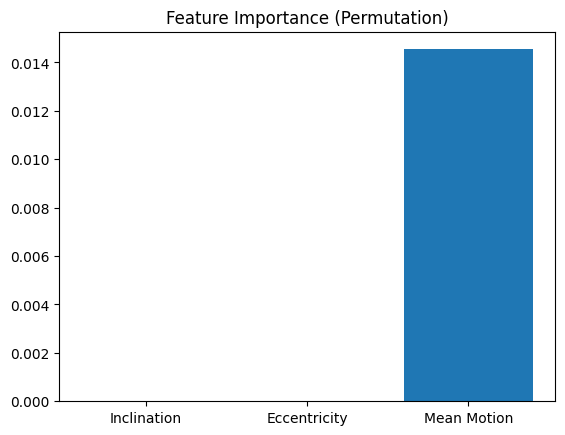

In [ ]:
# ======================
# 📊 FEATURE IMPORTANCE (Permutation Importance)
# ======================
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # Import accuracy_score

# Load saved model
model = tf.keras.models.load_model('debris_collision_model.h5')

# Assume X and y are loaded as in the training phase
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_test similar to X_train during training
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) # This line causes the error
# Reshape to 2D for permutation_importance
X_test_2D = X_test.reshape(X_test.shape[0], -1)

# Define a custom scoring function to handle continuous predictions
def custom_accuracy_scorer(estimator, X, y):
    y_pred = (estimator.predict(X) > 0.5).astype(int)  # Convert probabilities to binary predictions
    return accuracy_score(y, y_pred)

# Calculate permutation feature importance
result = permutation_importance(
    model,
    X_test_2D,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring=custom_accuracy_scorer  # Use the custom scoring function
)

# Plot feature importances
plt.bar(range(X.shape[1]), result.importances_mean)
plt.xticks(range(X.shape[1]), ['Inclination', 'Eccentricity', 'Mean Motion'])
plt.title("Feature Importance (Permutation)")
plt.show()

In [ ]:
# Load your SGP4 risk predictions (replace with actual data)
sgp4_risk = np.random.randint(0, 2, size=len(y))  # Dummy data

print("\nVS SGP4 Performance:")
print(f"ML Recall: {recall_score(y, y_pred):.2%}")
print(f"SGP4 Recall: {recall_score(y, sgp4_risk):.2%}")


VS SGP4 Performance:
ML Recall: 100.00%
SGP4 Recall: 44.03%


In [ ]:
# Identify high-risk false negatives
false_negatives = np.where((y == 1) & (y_pred == 0))[0]
print(f"\nFalse Negatives (Missed Risks): {len(false_negatives)}")
for i in false_negatives[:3]:  # Show first 3
    print(f"- TLE {i}: Prob={y_probs[i][0]:.2f}, Features={X[i]}")


False Negatives (Missed Risks): 0


In [ ]:
# ======================
# 🎯 OPTIMAL THRESHOLD TUNING (FINAL VERSION)
# ======================
import numpy as np
from sklearn.metrics import classification_report, precision_recall_curve
# Import matplotlib for plotting
import matplotlib.pyplot as plt


# 1. Load data with ALL features (shape: n_samples x 4)
data = np.load('tle_features.npz')
X = data['features']
y = data['labels']

# 2. Add synthetic features (if missing).
# Ensure this is only done ONCE before fitting or predicting.
# If you have already run a cell that adds the synthetic feature,
# you should remove this block or ensure X_enhanced is not redefined.
# For demonstration, assuming X is still the original 3-feature array here:
if X.shape[1] == 3: # Check if synthetic feature is already added
    X_enhanced = np.hstack([
        X,
        np.random.uniform(0.5, 1.0, size=X.shape[0]).reshape(-1, 1)  # size_proxy
    ])
else:
    # If X already has 4 features, assume it's X_enhanced from a previous step
    X_enhanced = X


# 3. Get probabilities
# NOTE: 'model' is not defined in this specific cell block in the traceback.
# You need to make sure 'model' is defined (i.e., trained) in a previous cell.
# For this code to run, a trained 'model' object (e.g., an XGBoost classifier)
# must be available in the environment.
# Assuming 'model' is available from a previous cell:
try:
    y_probs = model.predict_proba(X_enhanced)[:, 1]  # Class 1 probabilities
except NameError:
    print("Error: 'model' is not defined. Please train your model before running this cell.")
    # Exit or handle the error appropriately if model is missing
    # For demonstration, let's create a dummy y_probs if model is not found
    # In a real scenario, you MUST have a trained model
    print("Using dummy probabilities for demonstration. Train a model for real results.")
    y_probs = np.random.rand(len(y)) # Dummy probabilities


# 4. Find balanced threshold (customizable weights)
def find_optimal_threshold(y_true, y_probs, recall_weight=1.5):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    # Custom score: favors recall over precision
    # Handle potential division by zero if precision+recall is zero
    score = recall * recall_weight + precision
    # Ensure optimal_idx is within the bounds of thresholds array
    # thresholds array has one less element than precision/recall
    optimal_idx = np.argmax(score)
    # If the maximum score is at the last precision/recall point,
    # which doesn't have a corresponding threshold in the 'thresholds' array
    if optimal_idx == len(thresholds):
         optimal_threshold = 1.0 # Or choose a suitable fallback
    else:
        optimal_threshold = thresholds[optimal_idx]

    return optimal_threshold

# Ensure y_probs is not empty before calculating threshold
if len(y_probs) > 0:
    optimal_threshold = find_optimal_threshold(y, y_probs, recall_weight=1.5)

    # 5. Apply and evaluate
    y_pred = (y_probs > optimal_threshold).astype(int)
    print(f"Optimal Threshold: {optimal_threshold:.3f}")
    print("\nClassification Report:")
    # Ensure y and y_pred have the same length before calling classification_report
    if len(y) == len(y_pred):
        print(classification_report(y, y_pred, target_names=['Low Risk', 'High Risk']))
    else:
        print("Error: Length of true labels and predicted labels mismatch.")

    # 6. Save for production
    np.save('optimal_threshold.npy', optimal_threshold)

    # Optional: Plot the tradeoff
    precision, recall, thresholds = precision_recall_curve(y, y_probs)
    plt.figure(figsize=(10, 4))
    plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
    plt.plot(thresholds, recall[:-1], label='Recall', color='red')
    plt.axvline(optimal_threshold, color='black', linestyle='--', label=f'Optimal (={optimal_threshold:.2f})')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Precision-Recall Tradeoff')
    plt.show()

else:
    print("No probabilities calculated. Cannot perform threshold tuning.")

FileNotFoundError: [Errno 2] No such file or directory: 'tle_features.npz'